In [15]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [16]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import tensorflow as tf
from tensorflow import keras

# Perceptrons

In [3]:
iris = load_iris()
x = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(random_state=42)
per_clf.fit(x, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

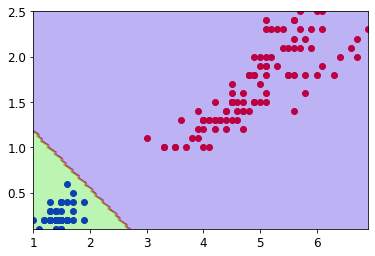

In [4]:
plt.scatter(x[y==0][:, 0], x[y==0][:, 1], c='r')
plt.scatter(x[y==1][:, 0], x[y==1][:, 1], c='b')

xx = np.linspace(np.min(x[:, 0]), np.max(np.max(x[:, 0])), 100)
yy = np.linspace(np.min(x[:, 1]), np.max(np.max(x[:, 1])), 100)

xs, ys = np.meshgrid(xx, yy)
x_new = np.c_[xs.ravel(), ys.ravel()]
y_new = per_clf.predict(x_new).reshape(xs.shape)

plt.contourf(xs, ys, y_new, cmap=plt.cm.brg, alpha=0.3)
plt.show()

# Implementing MLPs with Keras

In [5]:
import tensorflow as tf
from tensorflow import keras

'tensorflow', tf.__version__, 'keras', keras.__version__

('tensorflow', '2.1.0', 'keras', '2.2.4-tf')

### Image Classifier  

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
#try shufling dataset to inprove learning rate
idx = np.arange(len(X_train_full))
X_train_full = X_train_full[idx]
y_train_full = y_train_full[idx]

In [8]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [9]:
X_train, y_train = X_train_full[:50000] / 255., y_train_full[:50000]
X_valid, y_valid = X_train_full[50000:] / 255., y_train_full[50000:]
X_test = X_test / 255.

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
def plot_mnist(data, labels, n_cols=5):
    n_rows = (len(data) - 1) // n_cols + 1
    plt.figure(figsize=(1.5*n_cols, 1.5*n_rows))
    for index, (face, label) in enumerate(zip(data, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(class_names[label])
    plt.show()

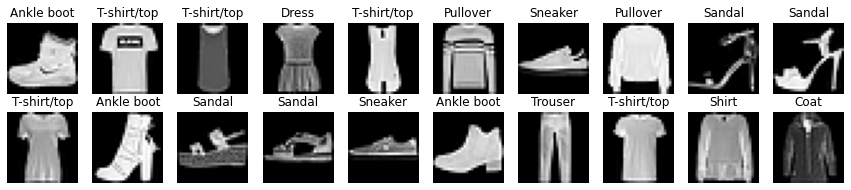

In [12]:
plot_mnist(X_train_full[:20], y_train_full[:20], 10)

**review Sequential API**

Нейросеть с 2я скрытыми слоями

In [13]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

layers can be added this way

In [14]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.layers

In [18]:
model.layers[1].name

'dense'

In [19]:
model.get_layer('dense_2').name

'dense_2'

In [20]:
weights, biases = model.get_layer('dense_2').get_weights()

In [21]:
print(weights.shape)
print(biases.shape)

(100, 10)
(10,)


**compile and learn**

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), 
                    workers=4, use_multiprocessing=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 10s 207us/sample - loss: 0.7375 - accuracy: 0.7602 - val_loss: 0.5185 - val_accuracy: 0.8245
Epoch 2/30
50000/50000 [==============================] - 12s 246us/sample - loss: 0.4899 - accuracy: 0.8312 - val_loss: 0.5004 - val_accuracy: 0.8285
Epoch 3/30
50000/50000 [==============================] - 10s 203us/sample - loss: 0.4462 - accuracy: 0.8438 - val_loss: 0.4424 - val_accuracy: 0.8448
Epoch 4/30
50000/50000 [==============================] - 10s 191us/sample - loss: 0.4178 - accuracy: 0.8547 - val_loss: 0.4358 - val_accuracy: 0.8469
Epoch 5/30
50000/50000 [==============================] - 9s 183us/sample - loss: 0.3997 - accuracy: 0.8603 - val_loss: 0.4411 - val_accuracy: 0.8446
Epoch 6/30
50000/50000 [==============================] - 9s 177us/sample - loss: 0.3813 - accuracy: 0.8659 - val_loss: 0.3888 - val_accuracy: 0.8635
Epoch 7/30
50000/50000 [======================

In [24]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1563,
 'samples': 50000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

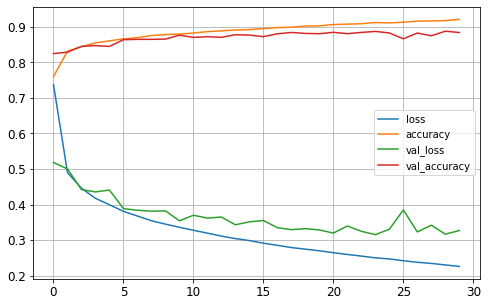

In [26]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [27]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 102us/sample - loss: 0.3507 - accuracy: 0.8739


[0.35066279246807097, 0.8739]

**Using the Model to Make Predictions** 

In [28]:
k = 10
x_new = X_test[:k]
y_pred = model.predict(x_new).round(2)
y_pred

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.19, 0.  , 0.01, 0.  , 0.  , 0.  , 0.79, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.95, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

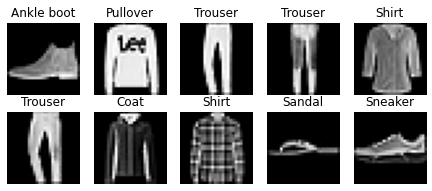

object 0 - 1.0% - Sandal
object 0 - 1.0% - Sneaker
object 0 - 98.0% - Ankle boot
object 1 - 98.0% - Pullover
object 1 - 2.0% - Coat
object 2 - 100.0% - Trouser
object 3 - 100.0% - Trouser
object 4 - 19.0% - T-shirt/top
object 4 - 1.0% - Pullover
object 4 - 79.0% - Shirt
object 5 - 100.0% - Trouser
object 6 - 99.0% - Coat
object 6 - 1.0% - Shirt
object 7 - 5.0% - Coat
object 7 - 95.0% - Shirt
object 8 - 100.0% - Sandal
object 9 - 100.0% - Sneaker


In [29]:
plot_mnist(X_test[:k], y_test[:k])

for i in range(len(x_new)):
    for j in range(10):
        if (y_pred[i][j] != 0):
            print("object {} - {:.4}% - {}".format(i, y_pred[i][j] * 100, class_names[j]))

### Regression example

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [31]:
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 119us/sample - loss: 1.6205 - val_loss: 2.0374
Epoch 2/20
11610/11610 [==============================] - 1s 106us/sample - loss: 0.7162 - val_loss: 0.6571
Epoch 3/20
11610/11610 [==============================] - 1s 93us/sample - loss: 0.6356 - val_loss: 0.5996
Epoch 4/20
11610/11610 [==============================] - 1s 92us/sample - loss: 0.5989 - val_loss: 0.5662
Epoch 5/20
11610/11610 [==============================] - 1s 91us/sample - loss: 0.5713 - val_loss: 0.5489
Epoch 6/20
11610/11610 [==============================] - 1s 91us/sample - loss: 0.5491 - val_loss: 0.5204
Epoch 7/20
11610/11610 [==============================] - 1s 92us/sample - loss: 0.5301 - val_loss: 0.5018
Epoch 8/20
11610/11610 [==============================] - 1s 93us/sample - loss: 0.5142 - val_loss: 0.4815
Epoch 9/20
11610/11610 [==============================] - 1s 93us/sample - loss: 0.5004 - val

### Building Complex Models Using the Functional API 

In [33]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [35]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 132us/sample - loss: 1.8737 - val_loss: 3.0492
Epoch 2/20
11610/11610 [==============================] - 1s 97us/sample - loss: 0.6683 - val_loss: 1.1377
Epoch 3/20
11610/11610 [==============================] - 1s 99us/sample - loss: 0.6017 - val_loss: 0.5548
Epoch 4/20
11610/11610 [==============================] - 1s 97us/sample - loss: 0.5638 - val_loss: 0.6451
Epoch 5/20
11610/11610 [==============================] - 1s 99us/sample - loss: 0.5383 - val_loss: 0.7438
Epoch 6/20
11610/11610 [==============================] - 1s 98us/sample - loss: 0.5208 - val_loss: 0.5584
Epoch 7/20
11610/11610 [==============================] - 1s 100us/sample - loss: 0.5023 - val_loss: 0.5218
Epoch 8/20
11610/11610 [==============================] - 1s 98us/sample - loss: 0.4891 - val_loss: 0.4561
Epoch 9/20
11610/11610 [==============================] - 1s 98us/sample - loss: 0.4767 - val

split features into several input layers

In [36]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [37]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 127us/sample - loss: 1.9991 - val_loss: 1.0075
Epoch 2/20
11610/11610 [==============================] - 1s 104us/sample - loss: 0.7938 - val_loss: 0.6976
Epoch 3/20
11610/11610 [==============================] - 1s 104us/sample - loss: 0.6527 - val_loss: 0.6241
Epoch 4/20
11610/11610 [==============================] - 1s 101us/sample - loss: 0.6001 - val_loss: 0.5800
Epoch 5/20
11610/11610 [==============================] - 1s 102us/sample - loss: 0.5672 - val_loss: 0.5550
Epoch 6/20
11610/11610 [==============================] - 1s 98us/sample - loss: 0.5425 - val_loss: 0.5244
Epoch 7/20
11610/11610 [==============================] - 1s 103us/sample - loss: 0.5226 - val_loss: 0.5056
Epoch 8/20
11610/11610 [==============================] - 1s 99us/sample - loss: 0.5070 - val_loss: 0.4827
Epoch 9/20
11610/11610 [==============================] - 1s 97us/sample - loss: 0.4943 -

aux output

In [38]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [39]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [40]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 165us/sample - loss: 2.2402 - main_output_loss: 1.9199 - aux_output_loss: 5.1157 - val_loss: 3.1638 - val_main_output_loss: 2.6007 - val_aux_output_loss: 8.2193
Epoch 2/20
11610/11610 [==============================] - 1s 106us/sample - loss: 1.0753 - main_output_loss: 0.8518 - aux_output_loss: 3.0880 - val_loss: 1.6513 - val_main_output_loss: 0.9707 - val_aux_output_loss: 7.7702
Epoch 3/20
11610/11610 [==============================] - 1s 108us/sample - loss: 0.8519 - main_output_loss: 0.7045 - aux_output_loss: 2.1783 - val_loss: 1.3147 - val_main_output_loss: 0.6829 - val_aux_output_loss: 6.9957
Epoch 4/20
11610/11610 [==============================] - 1s 112us/sample - loss: 0.7540 - main_output_loss: 0.6401 - aux_output_loss: 1.7769 - val_loss: 1.1449 - val_main_output_loss: 0.6071 - val_aux_output_loss: 5.9808
Epoch 5/20
11610/11610 [==============================] - 1s 10

In [41]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

5160/5160 [==============================] - 0s 61us/sample - loss: 0.4870 - main_output_loss: 0.4305 - aux_output_loss: 0.9978


### Saving and Restoring a Model

In [42]:
model.save("m_keras_model.h5")

In [43]:
model.save_weights("my_keras_weights.ckpt")

In [44]:
keras.models.load_model("m_keras_model.h5")

In [45]:
model.load_weights("my_keras_weights.ckpt")

### Using Callbacks 

In [46]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [47]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [48]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 123us/sample - loss: 1.8423 - val_loss: 5.2165
Epoch 2/10
11610/11610 [==============================] - 1s 98us/sample - loss: 0.6876 - val_loss: 0.7732
Epoch 3/10
11610/11610 [==============================] - 1s 104us/sample - loss: 0.5954 - val_loss: 0.5446
Epoch 4/10
11610/11610 [==============================] - 1s 91us/sample - loss: 0.5553 - val_loss: 0.5425
Epoch 5/10
11610/11610 [==============================] - 1s 96us/sample - loss: 0.5268 - val_loss: 0.5539
Epoch 6/10
11610/11610 [==============================] - 1s 96us/sample - loss: 0.5049 - val_loss: 0.4701
Epoch 7/10
11610/11610 [==============================] - 1s 90us/sample - loss: 0.4852 - val_loss: 0.4562
Epoch 8/10
11610/11610 [==============================] - 1s 90us/sample - loss: 0.4706 - val_loss: 0.4452
Epoch 9/10
11610/11610 [==============================] - 1s 92us/sample - loss: 0.4576 - val

In [49]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/200
11610/11610 [==============================] - 1s 120us/sample - loss: 0.4385 - val_loss: 0.4287
Epoch 2/200
11610/11610 [==============================] - 1s 93us/sample - loss: 0.4319 - val_loss: 0.4117
Epoch 3/200
11610/11610 [==============================] - 1s 91us/sample - loss: 0.4252 - val_loss: 0.3975
Epoch 4/200
11610/11610 [==============================] - 1s 91us/sample - loss: 0.4199 - val_loss: 0.3943
Epoch 5/200
11610/11610 [==============================] - 1s 88us/sample - loss: 0.4150 - val_loss: 0.3964
Epoch 6/200
11610/11610 [==============================] - 1s 93us/sample - loss: 0.4110 - val_loss: 0.3907
Epoch 7/200
11610/11610 [==============================] - 1s 93us/sample - loss: 0.4070 - val_loss: 0.3823
Epoch 8/200
11610/11610 [==============================] - 1s 93us/sample - loss: 0.4036 - val_loss: 0.3786
Epoch 9/200
11610/11610 [==============================] - 1s 91us/sample - loss: 0.40

Epoch 76/200
11610/11610 [==============================] - 1s 86us/sample - loss: 0.3341 - val_loss: 0.3196
Epoch 77/200
11610/11610 [==============================] - 1s 89us/sample - loss: 0.3338 - val_loss: 0.3608
Epoch 78/200
11610/11610 [==============================] - 1s 93us/sample - loss: 0.3336 - val_loss: 0.3295
Epoch 79/200
11610/11610 [==============================] - 1s 87us/sample - loss: 0.3331 - val_loss: 0.3928
Epoch 80/200
11610/11610 [==============================] - 1s 90us/sample - loss: 0.3332 - val_loss: 0.3167
Epoch 81/200
11610/11610 [==============================] - 1s 89us/sample - loss: 0.3317 - val_loss: 0.3784
Epoch 82/200
11610/11610 [==============================] - 1s 91us/sample - loss: 0.3322 - val_loss: 0.3155
Epoch 83/200
11610/11610 [==============================] - 1s 89us/sample - loss: 0.3315 - val_loss: 0.3540
Epoch 84/200
11610/11610 [==============================] - 1s 88us/sample - loss: 0.3312 - val_loss: 0.3282
Epoch 85/200
11610/

Лучшая модель получена на 91 эпохе.

Создадим собственный обратный вызов.

In [50]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [51]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11200/11610 [===========================>..] - ETA: 0s - loss: 0.3290
val/train: 1.08
11610/11610 [==============================] - 1s 94us/sample - loss: 0.3283 - val_loss: 0.3550
Epoch 2/2
11520/11610 [============================>.] - ETA: 0s - loss: 0.3268
val/train: 0.99
11610/11610 [==============================] - 1s 91us/sample - loss: 0.3283 - val_loss: 0.3250


### TensorBoard

In [96]:
root_logdir = os.path.join(os.curdir, "tensorboard_logs")

In [97]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./tensorboard_logs/run_2020_06_12-14_08_06'

In [98]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [99]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [100]:
tensorboard_cb = keras.callbacks.TensorBoard(log_dir=run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 2s 141us/sample - loss: 1.8423 - val_loss: 5.2165
Epoch 2/30
11610/11610 [==============================] - 1s 104us/sample - loss: 0.6876 - val_loss: 0.7732
Epoch 3/30
11610/11610 [==============================] - 1s 101us/sample - loss: 0.5954 - val_loss: 0.5446
Epoch 4/30
11610/11610 [==============================] - 1s 111us/sample - loss: 0.5553 - val_loss: 0.5425
Epoch 5/30
11610/11610 [==============================] - 1s 121us/sample - loss: 0.5268 - val_loss: 0.5539
Epoch 6/30
11610/11610 [==============================] - 2s 138us/sample - loss: 0.5049 - val_loss: 0.4701
Epoch 7/30
11610/11610 [==============================] - 2s 132us/sample - loss: 0.4852 - val_loss: 0.4562
Epoch 8/30
11610/11610 [==============================] - 2s 131us/sample - loss: 0.4706 - val_loss: 0.4452
Epoch 9/30
11610/11610 [==============================] - 2s 130us/sample - loss: 0.457

Чтобы запустить сервер TensorBoard необходимо ввести в терминале след. команду

```bash
$ tensorboard --logdir=./my_logs --reload_multifile=true --port=6006
```

Ключ *--reload_multifile=true* позволяет решить проблему, когда TensorBoard некорректно показывает графики обучения, из-за того, что некорректно определяет файл, содержащий данные:
https://github.com/tensorflow/tensorboard/issues/2084

После этого необходимо перейти по след. адресу в браузере [localhost:6006](http://localhost:6006). Чтобы остановить TensoBoard сервер необходимо отправить сигнал Ctrl-C в терминале.


В качестве альтернативы можно загрузить TensorBoard's Jupyter расширение и запускать TensorBoard так:

In [101]:
# %load_ext tensorboard
# %tensorboard --logdir=./my_logs --port=6006

Перезапуск 

In [103]:
run_logdir2 = get_run_logdir()

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 2s 140us/sample - loss: 5.6294 - val_loss: 1.3206
Epoch 2/30
11610/11610 [==============================] - 1s 112us/sample - loss: 1.2704 - val_loss: 1.0757
Epoch 3/30
11610/11610 [==============================] - 1s 114us/sample - loss: 0.9383 - val_loss: 0.8356
Epoch 4/30
11610/11610 [==============================] - 1s 122us/sample - loss: 0.8872 - val_loss: 0.8728
Epoch 5/30
11610/11610 [==============================] - 1s 120us/sample - loss: 0.8020 - val_loss: 0.5851
Epoch 6/30
11610/11610 [==============================] - 2s 147us/sample - loss: 1.2816 - val_loss: 1.3161
Epoch 7/30
11610/11610 [==============================] - 1s 108us/sample - loss: 1.3421 - val_loss: 1.3155
Epoch 8/30
11610/11610 [==============================] - 1s 103us/sample - loss: 1.3427 - val_loss: 1.3158
Epoch 9/30
11610/11610 [==============================] - 1s 114us/sample - loss: 0.971

In [105]:
help(keras.callbacks.TensorBoard)

Help on class TensorBoard in module tensorflow.python.keras.callbacks:

class TensorBoard(Callback)
 |  Enable visualizations for TensorBoard.
 |  
 |  TensorBoard is a visualization tool provided with TensorFlow.
 |  
 |  This callback logs events for TensorBoard, including:
 |  
 |  * Metrics summary plots
 |  * Training graph visualization
 |  * Activation histograms
 |  * Sampled profiling
 |  
 |  If you have installed TensorFlow with pip, you should be able
 |  to launch TensorBoard from the command line:
 |  
 |  ```sh
 |  tensorboard --logdir=path_to_your_logs
 |  ```
 |  
 |  You can find more information about TensorBoard
 |  [here](https://www.tensorflow.org/get_started/summaries_and_tensorboard).
 |  
 |  Arguments:
 |      log_dir: the path of the directory where to save the log files to be
 |        parsed by TensorBoard.
 |      histogram_freq: frequency (in epochs) at which to compute activation and
 |        weight histograms for the layers of the model. If set to 0, h

# Fine-Tuning Neural Network Hyperparameters 

In [4]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [6]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [23]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
keras_reg.score(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 118us/sample - loss: 1.1263 - val_loss: 5.9144
Epoch 2/100
11610/11610 [==============================] - 1s 103us/sample - loss: 0.7336 - val_loss: 2.9731
Epoch 3/100
11610/11610 [==============================] - 1s 96us/sample - loss: 0.5911 - val_loss: 0.7297
Epoch 4/100
11610/11610 [==============================] - 1s 98us/sample - loss: 0.5134 - val_loss: 0.4915
Epoch 5/100
11610/11610 [==============================] - 1s 101us/sample - loss: 0.4706 - val_loss: 0.4252
Epoch 6/100
11610/11610 [==============================] - 1s 100us/sample - loss: 0.4471 - val_loss: 0.4486
Epoch 7/100
11610/11610 [==============================] - 1s 100us/sample - loss: 0.4322 - val_loss: 0.4001
Epoch 8/100
11610/11610 [==============================] - 1s 89us/sample - loss: 0.4219 - val_loss: 0.3877
Epoch 9/100
11610/11610 [==============================] - 1s 104us/sample - loss:

-0.3643039729706077

**Выполним поиск гиперпараметров (кол-ва скрытых слое, нейронов, learning_rage)**

In [26]:
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2, n_jobs=-1)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.1min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f061043f828>, as the constructor either does not set or modifies parameter learning_rate

**Warning**: the following cell crashes at the end of training. This seems to be caused by [Keras issue #13586](https://github.com/keras-team/keras/issues/13586), which was triggered by a recent change in Scikit-Learn. [Pull Request #13598](https://github.com/keras-team/keras/pull/13598) seems to fix the issue, so this problem should be resolved soon.

In [44]:
p=rnd_search_cv.best_params_
p

{'learning_rate': 0.0051747964719537, 'n_hidden': 3, 'n_neurons': 55}

In [66]:
rnd_search_cv.best_score_

-0.3032503451051433

In [80]:
best_model = build_model(learning_rate=p['learning_rate'],
                         n_hidden=p['n_hidden'], n_neurons=p['n_neurons'])

savebest_cb = keras.callbacks.ModelCheckpoint("my_keras__best_model1.h5", save_best_only=True)

history = best_model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[savebest_cb, keras.callbacks.EarlyStopping(patience=10)])

best_model = keras.models.load_model("my_keras__best_model1.h5") # rollback to best model

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 140us/sample - loss: 0.8924 - val_loss: 2.1137
Epoch 2/100
11610/11610 [==============================] - 1s 104us/sample - loss: 0.4620 - val_loss: 0.3860
Epoch 3/100
11610/11610 [==============================] - 1s 100us/sample - loss: 0.4007 - val_loss: 0.3841
Epoch 4/100
11610/11610 [==============================] - 1s 107us/sample - loss: 0.3802 - val_loss: 0.3808
Epoch 5/100
11610/11610 [==============================] - 1s 108us/sample - loss: 0.3679 - val_loss: 0.3962
Epoch 6/100
11610/11610 [==============================] - 1s 110us/sample - loss: 0.3606 - val_loss: 0.3836
Epoch 7/100
11610/11610 [==============================] - 1s 104us/sample - loss: 0.3543 - val_loss: 0.3672
Epoch 8/100
11610/11610 [==============================] - 1s 108us/sample - loss: 0.3492 - val_loss: 0.3536
Epoch 9/100
11610/11610 [==============================] - 1s 109us/sample - lo

In [81]:


best_model.evaluate(X_train, y_train), 
best_model.evaluate(X_valid, y_valid), 
best_model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 51us/sample - loss: 0.2890


0.2889712770548902

In [84]:
y_test[:5], best_model.predict(X_test[:5]).ravel()

(array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   ]),
 array([0.55692244, 1.458277  , 5.0225763 , 2.59173   , 2.8153281 ],
       dtype=float32))

# Tasks

## task 2

*Draw an ANN using the original artificial neurons that computes A ⊕ B (where ⊕ represents the XOR operation). Hint: A ⊕ B = (A ∧ ¬ B) ∨ (¬ A ∧ B).*

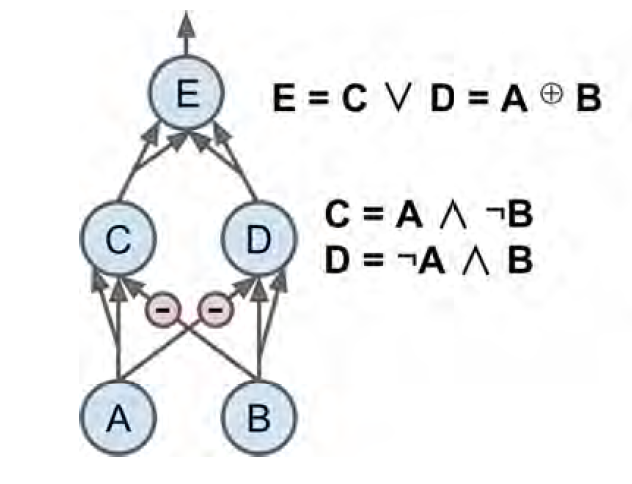

### task 3

*Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of threshold logic units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?*

Классический персептрон работает только с линейно разделяемыми данными и не возвращает вероятность принадлжености к классу в отличие от логистической регрессии. Чтобы перспетрон работал аналогично логистической регресии необходимо использовать функцию активации (логистическая функция или softmax) и использовать метод градиентного спуска минимизирующий фукнцию стоимости. 

### task 4
 
*Why was the logistic activation function a key ingredient in training the first MLPs?*

Потому, что при ее использовании простой персептрон очень похож на логистическую регрессию, а так же фукнция выгнутая и позволяет легко применять метод градиентного спуска. 

### task 5

*Name three popular activation functions. Can you draw them?*

- логистическая регрессия
- ReLU: max(0, z)
- hyperbolic tangent: 2σ(2z) – 1 

### task 6

*Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.

• What is the shape of the input matrix X?
• What about the shape of the hidden layer’s weight vector Wh, and the shape of
its bias vector bh?
• What is the shape of the output layer’s weight vector Wo, and its bias vector bo?
• What is the shape of the network’s output matrix Y?
• Write the equation that computes the network’s output matrix Y as a function
of X, Wh, bh, Wo and bo.
*

- входная матрица имеет размерность [mx10] (m - размерн набора)
- Wh[10x50], bh[50]
- Wo[50x3], bo[3]
- [mx3]
- (X*Wh + bh)*Wo + bo

### task 7

*How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, using what activation function? Answer the same questions for getting your network to predict housing prices as in Chapter 2.*

- 1 нейрон, логистическая функция
- 10 нейронов, так же логистическая функция или sortmax
- 1 нейрон, без фукнции активации

### task 8

*What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?*

Backpropagation is a technique used to train artificial neural networks. It first computes the gradients of the cost function with regards to every model parameter (all the weights and biases), and then it performs a Gradient Descent step using these gradients. This backpropagation step is typically performed thousands or millions of times, using many training batches, until the model parameters converge to values that (hopefully) minimize the cost function. To compute the gradients, backpropagation uses reverse-mode autodiff (although it wasn’t called that when backpropagation was invented, and it has been reinvented several times). Reverse-mode autodiff performs a forward pass through a computation graph, computing every node’s value for the current training batch, and then
it performs a reverse pass, computing all the gradients at once (see Appendix D for more details). So what’s the difference? Well, backpropagation refers to the whole process of training an artificial neural network using multiple backpropagation steps, each of which computes gradients and uses them to perform a Gradient Descent step. In contrast, reverse-mode autodiff is a simply a technique to compute gradients efficiently, and it happens to be used by backpropagation.

### task 9

*Can you list all the hyperparameters you can tweak in an MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?*

- кол-во нейронов;
- кол-во скрытых слоев
- форма скрытых слоев (например, пирамида) - почти не используется;
- learning rate
- batch size
- фукнции активации

### task 10

*Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Try adding all the bells and whistles (i.e., save checkpoints, use early stopping, plot learning curves using TensorBoard, and so on).*

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [2]:
x, y = mnist['data'], mnist['target'].astype(int)

Отмасштабируем данные

In [32]:
x_scalled = x / 255

Применим алгоритм PCA, чтобы сократить размерность

In [68]:
#from sklearn.decomposition import PCA

#pca = PCA(n_components=0.999)
#x_pca = pca.fit_transform(x_scalled)


x_pca = x_scalled
x_pca.shape

(70000, 784)

Разделим данные на все необходимые нам наборы

In [69]:
m_train = 50000
m_test  = 10000

x_train, y_train = x_pca[:m_train],        y[:m_train]
x_valid, y_valid = x_pca[m_train:-m_test], y[m_train:-m_test]
x_test, y_test   = x_pca[-m_test:],        y[-m_test:]

In [84]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Подготовим модель. Модель будет содержать 2а скрытых слоя, по 200 нейронов в каждом. Предположение такое - на 1м скрытом слое нейроны будут обучаться отдельным линиям, дугам и т.п. составляющим цифры, на 2м скрытом слое - нейроны будут обучаться фигурам (например, две петли составляющие 8-ку).

In [85]:
mnist_model = keras.models.Sequential()

mnist_model.add(keras.layers.Flatten(input_shape=[x_train.shape[1]]))
mnist_model.add(keras.layers.Dense(200, activation="relu"))
mnist_model.add(keras.layers.Dense(200, activation="relu"))
mnist_model.add(keras.layers.Dense(10, activation="softmax"))

Коэф-т learning_rate взят от балды, будем изменять его, если модель будет расходиться или не достигнем 98% точности

In [86]:
mnist_model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.SGD(lr=0.1), 
              metrics=['accuracy'])

Используем:
- раннюю оставноку, если в течении 20 эпох не было улучшений на наборе валидации;
- сохранение модели только с лучшими результатами (для послед. загрузки);
- сохранение кривых обучения для визуализаци в TensorBoard. 

In [88]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20,
                                                  restore_best_weights=True)
savebest_cb = keras.callbacks.ModelCheckpoint("mmodel01.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard('./t_logs/model01')

history = mnist_model.fit(x_train, y_train, epochs=200,
                          validation_data=(x_valid, y_valid),
                         callbacks=[early_stopping_cb, savebest_cb, tensorboard_cb])

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 7s 139us/sample - loss: 0.2898 - accuracy: 0.9133 - val_loss: 0.1806 - val_accuracy: 0.9461
Epoch 2/200
50000/50000 [==============================] - 6s 118us/sample - loss: 0.1184 - accuracy: 0.9644 - val_loss: 0.1123 - val_accuracy: 0.9656
Epoch 3/200
50000/50000 [==============================] - 7s 138us/sample - loss: 0.0824 - accuracy: 0.9754 - val_loss: 0.0956 - val_accuracy: 0.9724
Epoch 4/200
50000/50000 [==============================] - 7s 148us/sample - loss: 0.0594 - accuracy: 0.9814 - val_loss: 0.0814 - val_accuracy: 0.9758
Epoch 5/200
50000/50000 [==============================] - 7s 132us/sample - loss: 0.0442 - accuracy: 0.9866 - val_loss: 0.0836 - val_accuracy: 0.9757
Epoch 6/200
50000/50000 [==============================] - 6s 125us/sample - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0758 - val_accuracy: 0.9785
Epoch 7/200
50000/50000 [===================

In [92]:
mnist_model.evaluate(x_train, y_train)

50000/50000 [==============================] - 3s 60us/sample - loss: 0.0032 - accuracy: 0.9997


[0.0031636303977225907, 0.99968]

In [93]:
mnist_model.evaluate(x_valid, y_valid)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.0743 - accuracy: 0.9816


[0.07425380325159203, 0.9816]

In [89]:
mnist_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.0710 - accuracy: 0.9810


[0.07095045207158546, 0.981]

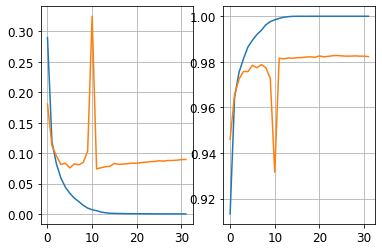

In [116]:
import pandas as pd

plt.subplot(121)
plt.grid(True)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.subplot(122)
plt.grid(True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()